In [1]:
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import database_credentials as dc

In [2]:
# Database credentials
postgres_user = dc.user()
postgres_pw = dc.pw()
postgres_host = dc.host()
postgres_port = dc.port()
postgres_db = dc.db()

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

# no need for an open connection,
# as we're only doing a single query
engine.dispose()

In [3]:
# creating a table for orders created
sql = '''
SELECT carrier_id, guid, id, date(created_at)
FROM ctms_db_public.msd_order
WHERE date(created_at) >= date(current_date - interval '28 days')
AND date(created_at) < date(current_date)
AND is_for_demo = False
'''
orders = pd.read_sql_query(sql, con=engine)
orders = orders.rename(columns={'id': 'order_id', 'guid': 'order_guid', 'date': 'created_at'})
orders

,carrier_id,order_guid,order_id,created_at
0,1568.0,fc077273-6a53-4d2f-9871-2b46306aa810,7842457,2020-12-22
1,26127.0,85cf15f9-3a97-404a-bb55-b481d8d4450b,7842579,2020-12-22
2,18514.0,03ea68c1-7267-499d-93ad-9ce39b399416,7842604,2020-12-22
3,39269.0,08f6ae83-4a97-4bcb-8273-0006125a5c98,7842652,2020-12-22
4,29212.0,ab1736b3-9c31-4855-966e-792033faaddd,7842700,2020-12-22
...,...,...,...,...
179942,6281.0,1d91529b-63a4-4d09-9b46-c79910829759,8025322,2021-01-18
179943,37443.0,0ac6a58a-e863-4f25-a66c-e014035c111a,8025338,2021-01-18
179944,44514.0,81f88a66-66d0-4db0-aa54-85b12a01113e,8025354,2021-01-18
179945,24805.0,a70c071d-a583-4148-abcd-6380d6565a9b,8025370,2021-01-18


In [4]:
# creating a table for carriers
sql = '''
SELECT name, guid, id
FROM ctms_db_public.msd_carrier
WHERE test_account = False
'''
carriers = pd.read_sql_query(sql, con=engine)
carriers = carriers.rename(columns={'id': 'carrier_id', 'guid': 'carrier_guid', 'name': 'carrier_name'})
carriers

,carrier_name,carrier_guid,carrier_id
0,ayman,71918a40-f1df-4b52-b925-129ed39183f1,7
1,CN2,c623837b-04ee-4cf7-a44c-bca993c4d057,16
2,Transcontinental Express LLC,e835ef60-4200-4863-916a-0eed5bd18f93,25
3,Sifuentes Auto Transport,0a142cbc-cc41-42be-96cc-9bee4dde0929,29
4,A1 USA Express,e97661bf-33fa-4b77-b4b4-23c960e54da8,37
...,...,...,...
40888,AXIS TRANSPORTATION AND LOGISTICS LLC,247627df-ba58-4e8d-8de7-0a1b27324362,39771
40889,TRANSPORTING INVOICE,ee44f70f-3ca3-44a9-98b0-8e2281994b28,1861
40890,Suffy Transport,cdb6346e-1ba1-42a8-a9c3-e7bf2fb9a5d6,20694
40891,ALL AMERICAN RV SERVICES LLC,cccd264d-7453-4fbc-b76f-2074c73d5134,32349


In [5]:
# Creating a table with all drivers
sql = '''
SELECT genericuser_ptr_id, carrier_id, guid
FROM ctms_db_public.msd_driver
WHERE is_suspended = False
'''
drivers = pd.read_sql_query(sql, con=engine)
drivers = drivers.rename(columns={'guid': 'driver_guid'})
drivers

,genericuser_ptr_id,carrier_id,driver_guid
0,27,5478,4d7b7eb2-342c-4712-b3a9-573b2c47806b
1,77,5478,19bb361d-b9ba-4216-98cb-615bf8fc60a1
2,95,36,6fd348b4-7549-4377-a5e0-1c84494e0723
3,111,49,2e3710b3-9c35-41db-942e-ae83c7199218
4,129,5478,e0f4ea96-c069-4219-a2c4-671f29f5deb7
...,...,...,...
62970,84478,34878,fadba91f-a9ef-4968-a47e-dc5371c2a036
62971,84761,166,8eb7ddc1-3489-4c30-8128-9993d0072b7d
62972,84975,13642,62d38c0d-4afd-43e0-ac45-3411bd388114
62973,85358,2305,2c220ce5-1228-427f-8fde-b3e7c3ffd02e


In [6]:
# Joining carrier table with driver table
drivers_with_carrier_guid = drivers.merge(carriers, how='left',
                                          left_on='carrier_id', right_on='carrier_id')
drivers_with_carrier_guid

,genericuser_ptr_id,carrier_id,driver_guid,carrier_name,carrier_guid
0,27,5478,4d7b7eb2-342c-4712-b3a9-573b2c47806b,DUMMY ACCOUNT (DO NOT ACTIVATE),9421bc9d-fa9e-49d1-9a07-e5570d3c0b74
1,77,5478,19bb361d-b9ba-4216-98cb-615bf8fc60a1,DUMMY ACCOUNT (DO NOT ACTIVATE),9421bc9d-fa9e-49d1-9a07-e5570d3c0b74
2,95,36,6fd348b4-7549-4377-a5e0-1c84494e0723,Pegasus auto transport,a850fd2c-6a40-4cbf-a149-3e9971654e31
3,111,49,2e3710b3-9c35-41db-942e-ae83c7199218,Jeffries Transport Services,c1d94c53-2803-4fe5-b9c9-8df3a0a58670
4,129,5478,e0f4ea96-c069-4219-a2c4-671f29f5deb7,DUMMY ACCOUNT (DO NOT ACTIVATE),9421bc9d-fa9e-49d1-9a07-e5570d3c0b74
...,...,...,...,...,...
62970,84478,34878,fadba91f-a9ef-4968-a47e-dc5371c2a036,RED WHEELS INC,00bf92bb-7066-4ae0-8709-e2b292298f67
62971,84761,166,8eb7ddc1-3489-4c30-8128-9993d0072b7d,UZ Auto Trans Inc,3da07a51-afb4-4efe-8be0-29a823c2fc8f
62972,84975,13642,62d38c0d-4afd-43e0-ac45-3411bd388114,Automotive Resource Management,068a1a32-c826-42a1-9a3b-7be55bb2add0
62973,85358,2305,2c220ce5-1228-427f-8fde-b3e7c3ffd02e,"Extra Mile Transport, Inc",411834a1-ddbe-49c8-970a-de52874a42ba


In [7]:
# findind the unique number of activated drivers for each carrier
active_driver_count = (drivers_with_carrier_guid.groupby(['carrier_guid', 'carrier_id', 'carrier_name'])
                                                        [['genericuser_ptr_id']].nunique())
active_driver_count.reset_index(inplace=True)
active_driver_count = active_driver_count.rename(columns={'genericuser_ptr_id': 'activated_drivers'})
active_driver_count

,carrier_guid,carrier_id,carrier_name,activated_drivers
0,000243e7-afae-455a-8e61-5c691916f39e,31952,PERFECT SERVICES LLC,1
1,0004758e-daf4-4d3f-8257-be49db385d8e,1198,Flete,1
2,000acb9e-e4bb-4cff-a5b3-3bedcf05babf,29808,R-MICHAEL ENT LLC,1
3,000b7030-5bfc-4c95-8627-df29412347ff,43133,MACROD TOWING LLC,1
4,000b8e63-986b-4bae-befe-22481e2bfc9c,32277,AB TRANSPORT SERVICE,1
...,...,...,...,...
38479,fff8e9ba-cbcd-4bf7-8f92-b00fba5ba543,9501,Alpha Transport,1
38480,fffa8e6a-3943-47f5-bc00-52f59d9cd0c6,28014,NEAGU INC,1
38481,fffb578c-7297-4ade-996d-eef9aed6c22c,9916,SAM TRANSPORT LLC,1
38482,ffff3737-7524-40a4-b225-a8832c96bf91,6038,Gshsh,1


In [8]:
#Joining carrier table with order table

orders_w_driver_count = orders.merge(active_driver_count, left_on='carrier_id', right_on='carrier_id')
orders_w_driver_count

,carrier_id,order_guid,order_id,created_at,carrier_guid,carrier_name,activated_drivers
0,1568.0,fc077273-6a53-4d2f-9871-2b46306aa810,7842457,2020-12-22,7b08c65a-a1f4-4666-8058-2bf9cfb92955,"F/T Lima, LLC",24
1,1568.0,51dc1581-4851-4831-ba57-f22f33d6432b,7842458,2020-12-22,7b08c65a-a1f4-4666-8058-2bf9cfb92955,"F/T Lima, LLC",24
2,1568.0,1bf943ee-2125-47bd-b4d5-49bb6e33c089,7853557,2020-12-23,7b08c65a-a1f4-4666-8058-2bf9cfb92955,"F/T Lima, LLC",24
3,1568.0,0b798bbf-b5b0-40d1-b471-d78ae097541b,7880477,2020-12-29,7b08c65a-a1f4-4666-8058-2bf9cfb92955,"F/T Lima, LLC",24
4,1568.0,21661c2d-8ae6-4905-a96c-3e09e73dfefe,7853544,2020-12-23,7b08c65a-a1f4-4666-8058-2bf9cfb92955,"F/T Lima, LLC",24
...,...,...,...,...,...,...,...
176874,34860.0,a5e156f5-86b4-43e4-87f4-0db2f3a234dd,7975239,2021-01-12,c72dbb00-b90a-4e06-8685-0a8db3715752,RED & WHITE TRANSPORTATION LLC,8
176875,44387.0,eaf657d7-3027-435d-8583-86104a82df0f,8004113,2021-01-15,545c8985-32af-4e43-a6a9-15259208e5c2,EXPEDITED LOGISTICS OF GEORGIA LLC,2
176876,25598.0,9369687d-4c31-43f6-b2bf-b9f4d0986717,8025200,2021-01-18,7b569aa8-07bc-4ffc-88a1-2db581eecc74,PARAGON ENTERPRISES,2
176877,35714.0,0dfede6e-b6a8-4fce-b19d-9c12da5c190c,8023423,2021-01-18,eeb512dc-fc62-4f5a-8d96-ee499ea91a73,J & M AUTO CARRIER TRANSPORT LLC,1


In [9]:
result = orders_w_driver_count.groupby(['carrier_id', 'carrier_guid']).nunique()[['created_at']]
result.reset_index(inplace=True)
result = result.rename(columns={'created_at': 'unique_days_creating_orders'})
result

,carrier_id,carrier_guid,unique_days_creating_orders
0,23.0,e4a8cba1-0639-4f7b-af13-f9a01d13c7fa,5
1,75.0,22fa8f2e-628c-4e26-aeef-f7f3d0cf78ec,3
2,86.0,896fa994-e141-4b84-84c5-22277f3e8cbf,10
3,88.0,af54a172-e9d3-4c23-8696-de0c303bfb23,17
4,105.0,ebe0f9b7-e157-40f8-9a90-8a73fcb204dd,16
...,...,...,...
5239,44488.0,d40e0558-aee8-4b88-ae05-467cf27246a1,1
5240,44497.0,2a6c66a2-7fcf-429a-8e90-480115bdfd06,1
5241,44501.0,3ca9726f-a286-4873-a35d-4b49ab85002b,1
5242,44505.0,ec7f6cc1-4b98-4392-9841-c7c22cd59b7a,1


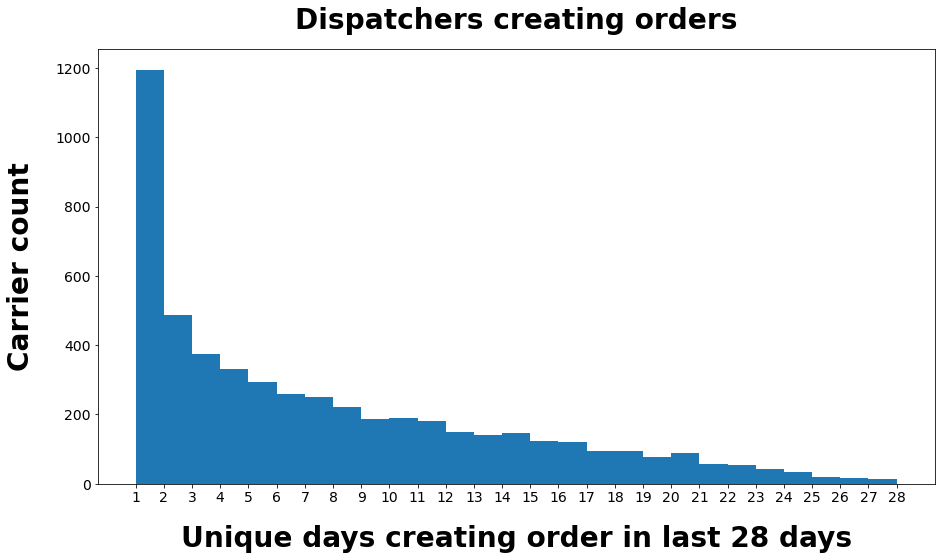

In [10]:
# histogram of unique days of creating orders
plt.figure(figsize=(15,8))
plt.hist(result['unique_days_creating_orders'], bins=np.arange(1, 29))
plt.xticks(np.arange(1, 29), fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Unique days creating order in last 28 days', fontsize=28, fontweight='bold', labelpad=20)
plt.ylabel('Carrier count', fontsize=28, fontweight='bold', labelpad=20)
plt.title('Dispatchers creating orders', fontsize=28, fontweight='bold', pad=20)
plt.show()

# Now let's segment paid users and free users

In [11]:
# creating a table for braintree subscriptions
sql = '''
DROP TABLE IF EXISTS #carrier_with_latest_sub_date
;
SELECT 
carrier_id
,max(created_at) AS last_sub
INTO #carrier_with_latest_sub_date
FROM ctms_db_public.billing_braintreesubscription
WHERE braintree_subscription_status IN ('Active', 'Past Due', 'Pending')
GROUP BY carrier_id
;
SELECT 
#carrier_with_latest_sub_date.carrier_id
,last_sub
,braintree_subscription_status
FROM #carrier_with_latest_sub_date
JOIN ctms_db_public.billing_braintreesubscription
ON #carrier_with_latest_sub_date.carrier_id = billing_braintreesubscription.carrier_id
AND #carrier_with_latest_sub_date.last_sub = billing_braintreesubscription.created_at
WHERE billing_braintreesubscription.braintree_subscription_status IN ('Active', 'Past Due', 'Pending')
;
'''
braintree_subs = pd.read_sql_query(sql, con=engine)
braintree_subs

,carrier_id,last_sub,braintree_subscription_status
0,2978,2016-11-26 09:21:34.937541,Active
1,5164,2017-01-05 22:15:51.921429,Active
2,3109,2016-11-26 09:21:33.283626,Active
3,8280,2017-06-17 15:20:29.527819,Active
4,831,2016-11-26 09:21:32.012823,Active
...,...,...,...
2865,17442,2021-01-18 19:32:37.305718,Active
2866,6838,2021-01-18 20:18:39.827984,Active
2867,24454,2021-01-18 21:06:22.056378,Active
2868,23770,2021-01-18 23:05:46.114469,Active


In [12]:
# joining carriers with braintree table

braintree_with_carriers = braintree_subs.merge(carriers, left_on='carrier_id', right_on='carrier_id')
braintree_with_carriers

,carrier_id,last_sub,braintree_subscription_status,carrier_name,carrier_guid
0,2978,2016-11-26 09:21:34.937541,Active,AU-THENTIC INDUSTRIES LLC,1e1366e5-0c67-4019-bd33-e255416c7df7
1,5164,2017-01-05 22:15:51.921429,Active,Capital Trucking LLC,255749b3-8b17-421a-a3ed-353ca3472495
2,3109,2016-11-26 09:21:33.283626,Active,MEI Transportation Services Inc,49cdf08d-56ea-48c6-87d1-91515bf31639
3,8280,2017-06-17 15:20:29.527819,Active,ZPA Incorporated,ba962dbd-1e32-4caf-83e9-59db46983d6a
4,831,2016-11-26 09:21:32.012823,Active,Born Again Hauling,6f3b99e9-ad63-4ca1-abae-44b6c7cd0a14
...,...,...,...,...,...
2865,17442,2021-01-18 19:32:37.305718,Active,Sterling Auto Carriers,4eca0916-fc83-4161-9254-49098abfe713
2866,6838,2021-01-18 20:18:39.827984,Active,DENVER AUTO MOVER INC.,c11c060e-75d6-4943-a005-0b0f9b06b1c5
2867,24454,2021-01-18 21:06:22.056378,Active,EMPIRE TRUCKING INC,bec234f4-86e3-4ea1-aefb-4dc6c76e8baf
2868,23770,2021-01-18 23:05:46.114469,Active,ODIMA TRANSPORT & TOWING LLC,0c0de455-f815-4c73-a349-bb6ee64abc9f


# Paid users

In [13]:
result_paid_users = orders_w_driver_count.merge(braintree_with_carriers,
                                                left_on=['carrier_guid', 'carrier_id'],
                                                right_on=['carrier_guid', 'carrier_id'])
result_paid_users = result_paid_users.groupby(['carrier_id', 'carrier_guid']).nunique()
result_paid_users.reset_index(inplace=True)
result_paid_users = result_paid_users.rename(columns={'created_at': 'unique_days_creating_order'})
result_paid_users

,carrier_id,carrier_guid,order_guid,order_id,unique_days_creating_order,carrier_name_x,activated_drivers,last_sub,braintree_subscription_status,carrier_name_y
0,131.0,bd258e71-c722-41e3-8d00-a90c2b47703b,39,39,13,1,1,1,1,1
1,155.0,dc44c34d-0ebc-422a-8d21-f2a76eeda9d4,107,107,22,1,1,1,1,1
2,160.0,b70de542-f3d3-4c24-938e-2a74121deec8,22,22,10,1,1,1,1,1
3,166.0,3da07a51-afb4-4efe-8be0-29a823c2fc8f,2306,2306,26,1,1,1,1,1
4,198.0,a07a1791-2ddf-43d6-ac6b-99c8d2bdca78,79,79,17,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...
1748,43975.0,48429e5d-2269-44f5-a256-9e24b4dca862,33,33,11,1,1,1,1,1
1749,44006.0,c29729d8-a5ad-4026-bbf7-a35d81f2c0f4,15,15,2,1,1,1,1,1
1750,44020.0,4faaa428-11ff-4830-b55d-84afd85eef95,14,14,4,1,1,1,1,1
1751,44026.0,e61e8322-6fe9-4e3a-9f67-0f84a2c4cd0e,14,14,5,1,1,1,1,1


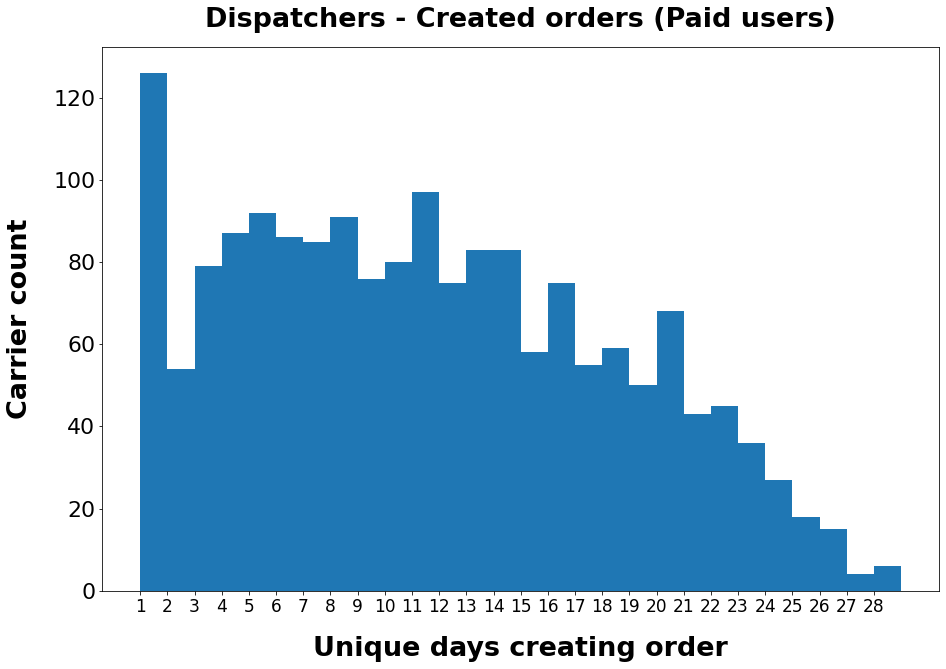

In [14]:
# histogram of unique orders created in last 28 days (paid users)
plt.figure(figsize=(15,10))
plt.hist(result_paid_users['unique_days_creating_order'], bins=np.arange(1, 30))
plt.xticks(np.arange(1, 29), fontsize=17)
plt.yticks(fontsize=22)
plt.xlabel('Unique days creating order', fontsize=27, fontweight='bold', labelpad=20)
plt.ylabel('Carrier count', fontsize=27, fontweight='bold', labelpad=20)
plt.title('Dispatchers - Created orders (Paid users)', fontsize=27, fontweight='bold', pad=20)
plt.show()

# Free users

In [15]:
orders_free_users = orders_w_driver_count.merge(braintree_with_carriers, how='left',
                                                left_on=['carrier_guid', 'carrier_id'],
                                                right_on=['carrier_guid', 'carrier_id'])
# free users
free_users = orders_free_users['braintree_subscription_status'].isna() == True
# dropping all paid user rows
orders_free_users = orders_free_users[free_users]
result_free_users = orders_free_users.groupby(['carrier_id', 'carrier_guid']).nunique()
result_free_users.reset_index(inplace=True)
result_free_users = result_free_users.rename(columns={'created_at': 'unique_days_creating_order'})
result_free_users

,carrier_id,carrier_guid,order_guid,order_id,unique_days_creating_order,carrier_name_x,activated_drivers,last_sub,braintree_subscription_status,carrier_name_y
0,23.0,e4a8cba1-0639-4f7b-af13-f9a01d13c7fa,13,13,5,1,1,0,0,0
1,75.0,22fa8f2e-628c-4e26-aeef-f7f3d0cf78ec,4,4,3,1,1,0,0,0
2,86.0,896fa994-e141-4b84-84c5-22277f3e8cbf,44,44,10,1,1,0,0,0
3,88.0,af54a172-e9d3-4c23-8696-de0c303bfb23,32,32,17,1,1,0,0,0
4,105.0,ebe0f9b7-e157-40f8-9a90-8a73fcb204dd,63,63,16,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
3486,44488.0,d40e0558-aee8-4b88-ae05-467cf27246a1,1,1,1,1,1,0,0,0
3487,44497.0,2a6c66a2-7fcf-429a-8e90-480115bdfd06,1,1,1,1,1,0,0,0
3488,44501.0,3ca9726f-a286-4873-a35d-4b49ab85002b,9,9,1,1,1,0,0,0
3489,44505.0,ec7f6cc1-4b98-4392-9841-c7c22cd59b7a,4,4,1,1,1,0,0,0


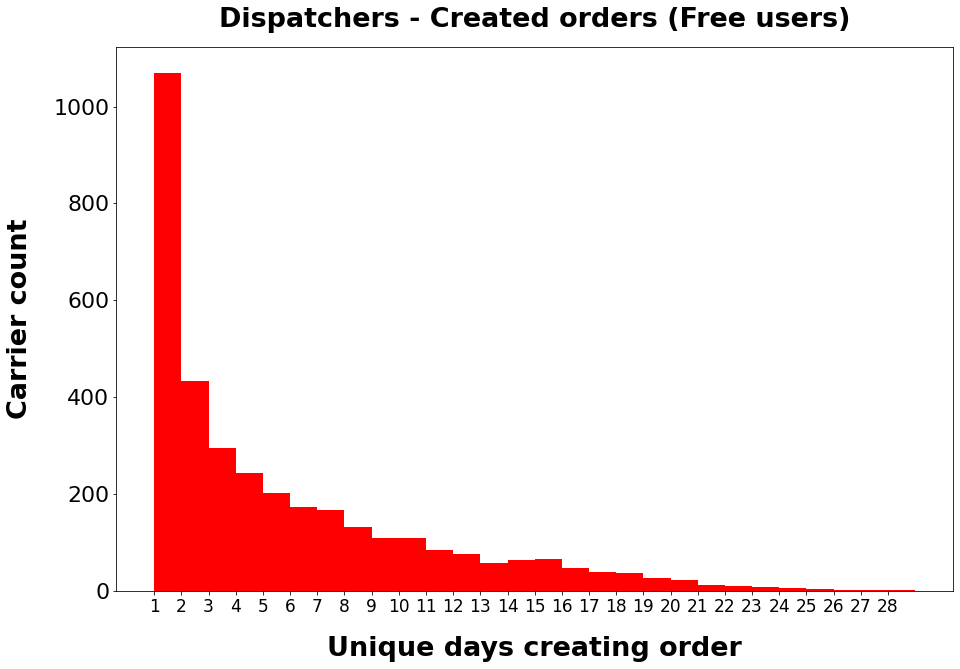

In [16]:
# histogram of unique orders created in last 28 days (paid users)
plt.figure(figsize=(15,10))
plt.hist(result_free_users['unique_days_creating_order'], bins=np.arange(1, 30), color='red')
plt.xticks(np.arange(1, 29), fontsize=17)
plt.yticks(fontsize=22)
plt.xlabel('Unique days creating order', fontsize=27, fontweight='bold', labelpad=20)
plt.ylabel('Carrier count', fontsize=27, fontweight='bold', labelpad=20)
plt.title('Dispatchers - Created orders (Free users)', fontsize=27, fontweight='bold', pad=20)
plt.show()

# Bar graph for paid and free users

In [17]:
total_paid_carriers_for_days_active = []

for i in range(1,29):
    paid_active_carrier_count = (result_paid_users[result_paid_users['unique_days_creating_order'] >= i]
                           .groupby('unique_days_creating_order').count()['carrier_guid'].sum())
    
    total_paid_carriers_for_days_active.append(paid_active_carrier_count)
    


total_free_carriers_for_days_active = []

for i in range(1,29):
    free_active_carrier_count = (result_free_users[result_free_users['unique_days_creating_order'] >= i]
                           .groupby('unique_days_creating_order').count()['carrier_guid'].sum())
    
    total_free_carriers_for_days_active.append(free_active_carrier_count)

In [18]:
paid_active_carriers = pd.DataFrame()
paid_active_carriers['definition_is_this_many_days_active'] = np.arange(1,29)
paid_active_carriers.set_index('definition_is_this_many_days_active', inplace=True)
paid_active_carriers['total_carriers_at_least_this_active'] = total_paid_carriers_for_days_active
paid_active_carriers['total_percentage_active'] = round(100*paid_active_carriers['total_carriers_at_least_this_active']
                                                       /len(result_paid_users))
paid_active_carriers['total_percentage_dormant'] = 100 - paid_active_carriers['total_percentage_active']


free_active_carriers = pd.DataFrame()
free_active_carriers['definition_is_this_many_days_active'] = np.arange(1,29)
free_active_carriers.set_index('definition_is_this_many_days_active', inplace=True)
free_active_carriers['total_carriers_at_least_this_active'] = total_free_carriers_for_days_active
free_active_carriers['total_percentage_active'] = round(100*free_active_carriers['total_carriers_at_least_this_active']
                                                       /len(result_free_users))
free_active_carriers['total_percentage_dormant'] = 100 - free_active_carriers['total_percentage_active']

In [19]:
def paid_vs_non_paid(paid_metric_definition, non_paid_metric_definition):
    plt.figure(figsize=(13,11))
    plt.subplots_adjust(wspace=.9)
    
    plt.subplot(1,2,1)
    paid_graph = sns.barplot(x=['active', 'dormant'],
                        y=[paid_active_carriers.loc[paid_metric_definition, 'total_carriers_at_least_this_active'],
                           (paid_active_carriers.loc[1, 'total_carriers_at_least_this_active'] - 
                            paid_active_carriers.loc[paid_metric_definition, 'total_carriers_at_least_this_active'])],
                        palette='muted')
    for p in paid_graph.patches:
        paid_graph.annotate(p.get_height(), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, -20), 
                       textcoords = 'offset points',
                       fontsize=20)
        paid_graph.annotate('{}%'.format(round(100*p.get_height()/paid_active_carriers.loc[1, 'total_carriers_at_least_this_active'])), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, 15), 
                       textcoords = 'offset points',
                       fontsize=20)
    plt.xticks(fontsize=18, fontweight='bold')
    plt.yticks(fontsize=18)
    plt.ylabel('Carrier Count', fontsize=28, fontweight='bold', labelpad=20)
    title = '''If {} out of 28 days
created load
(paid users)'''.format(paid_metric_definition)
    plt.title(title, fontsize=28, fontweight='bold', pad=20)

        
    
    plt.subplot(1,2,2)
    non_paid_graph = sns.barplot(x=['active', 'dormant'],
                        y=[free_active_carriers.loc[non_paid_metric_definition, 'total_carriers_at_least_this_active'],
                           (free_active_carriers.loc[1, 'total_carriers_at_least_this_active'] - 
                            free_active_carriers.loc[non_paid_metric_definition, 'total_carriers_at_least_this_active'])],
                        palette='muted')
    for p in non_paid_graph.patches:
        non_paid_graph.annotate(p.get_height(), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, -20), 
                       textcoords = 'offset points',
                       fontsize=20)
        non_paid_graph.annotate('{}%'.format(round(100*p.get_height()/free_active_carriers.loc[1, 'total_carriers_at_least_this_active'])), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, 15), 
                       textcoords = 'offset points',
                       fontsize=20)
    plt.xticks(fontsize=18, fontweight='bold')
    plt.yticks(fontsize=18)
    title = '''If {} out of 28 days
created load
(free users)'''.format(non_paid_metric_definition)
    plt.title(title, fontsize=28, fontweight='bold', pad=20)
    plt.show()

# Active users based on definition of metric
### Left side = Paid users
### Right side = Free users
### Our qualitative hypothesis was that a driver would open the app 16 out of 28 days.

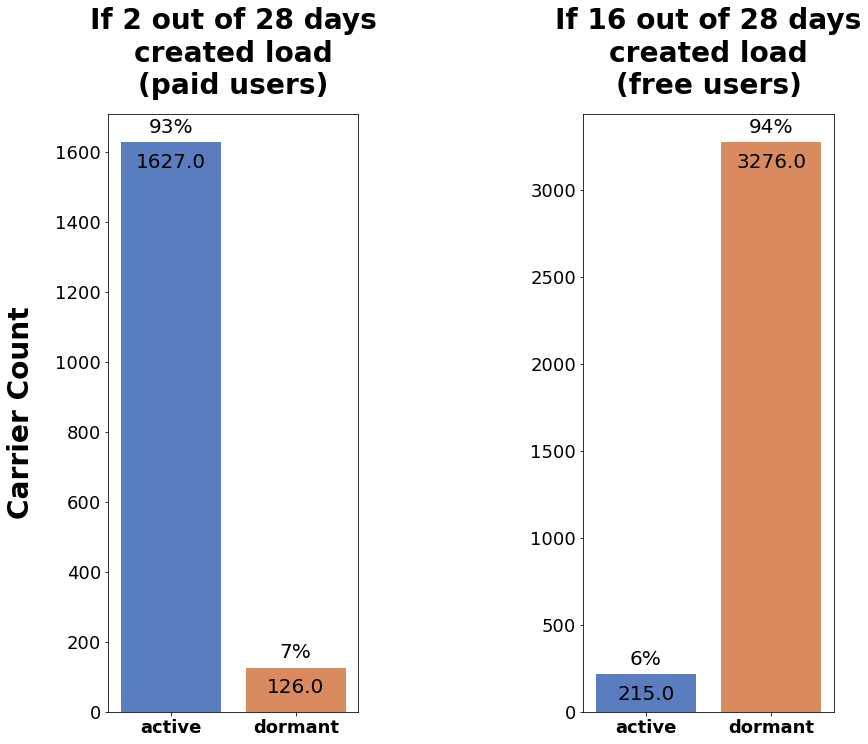

In [20]:
paid_vs_non_paid(2, 16)

In [21]:
all_paid_carriers = braintree_with_carriers
all_paid_carriers

,carrier_id,last_sub,braintree_subscription_status,carrier_name,carrier_guid
0,2978,2016-11-26 09:21:34.937541,Active,AU-THENTIC INDUSTRIES LLC,1e1366e5-0c67-4019-bd33-e255416c7df7
1,5164,2017-01-05 22:15:51.921429,Active,Capital Trucking LLC,255749b3-8b17-421a-a3ed-353ca3472495
2,3109,2016-11-26 09:21:33.283626,Active,MEI Transportation Services Inc,49cdf08d-56ea-48c6-87d1-91515bf31639
3,8280,2017-06-17 15:20:29.527819,Active,ZPA Incorporated,ba962dbd-1e32-4caf-83e9-59db46983d6a
4,831,2016-11-26 09:21:32.012823,Active,Born Again Hauling,6f3b99e9-ad63-4ca1-abae-44b6c7cd0a14
...,...,...,...,...,...
2865,17442,2021-01-18 19:32:37.305718,Active,Sterling Auto Carriers,4eca0916-fc83-4161-9254-49098abfe713
2866,6838,2021-01-18 20:18:39.827984,Active,DENVER AUTO MOVER INC.,c11c060e-75d6-4943-a005-0b0f9b06b1c5
2867,24454,2021-01-18 21:06:22.056378,Active,EMPIRE TRUCKING INC,bec234f4-86e3-4ea1-aefb-4dc6c76e8baf
2868,23770,2021-01-18 23:05:46.114469,Active,ODIMA TRANSPORT & TOWING LLC,0c0de455-f815-4c73-a349-bb6ee64abc9f


In [22]:
all_free_carriers =  carriers.merge(braintree_with_carriers, how='left',
                                        left_on='carrier_guid', right_on='carrier_guid')

# getting all free users
non_payers = all_free_carriers['braintree_subscription_status'].isna() == True
# #dropping all rows with paid users
all_free_carriers = all_free_carriers[non_payers]
all_free_carriers

,carrier_name_x,carrier_guid,carrier_id_x,carrier_id_y,last_sub,braintree_subscription_status,carrier_name_y
0,ayman,71918a40-f1df-4b52-b925-129ed39183f1,7,NaN,NaT,NaN,NaN
1,CN2,c623837b-04ee-4cf7-a44c-bca993c4d057,16,NaN,NaT,NaN,NaN
2,Transcontinental Express LLC,e835ef60-4200-4863-916a-0eed5bd18f93,25,NaN,NaT,NaN,NaN
3,Sifuentes Auto Transport,0a142cbc-cc41-42be-96cc-9bee4dde0929,29,NaN,NaT,NaN,NaN
4,A1 USA Express,e97661bf-33fa-4b77-b4b4-23c960e54da8,37,NaN,NaT,NaN,NaN
...,...,...,...,...,...,...,...
40881,Vip Auto Trans Inc,1e03a89b-27e6-4504-ad18-46aab277840d,18659,NaN,NaT,NaN,NaN
40883,TURBO TRANSPORTATION GROUP LLC,00442282-674b-4597-95be-3456e9ed54f1,43636,NaN,NaT,NaN,NaN
40887,ACTION TRANSPORT SERVICE LLC,427a843f-083d-45be-9c57-04cdcad14ce8,26082,NaN,NaT,NaN,NaN
40889,TRANSPORTING INVOICE,ee44f70f-3ca3-44a9-98b0-8e2281994b28,1861,NaN,NaT,NaN,NaN


In [23]:
paid_active_carriers = pd.DataFrame()
paid_active_carriers['definition_is_this_many_days_active'] = np.arange(1,29)
paid_active_carriers.set_index('definition_is_this_many_days_active', inplace=True)
paid_active_carriers['total_carriers_at_least_this_active'] = total_paid_carriers_for_days_active
paid_active_carriers['total_dormant_carriers'] = ([len(all_paid_carriers) - total_paid_carriers_for_days_active[x]
                                                 for x in range(len(total_paid_carriers_for_days_active))]) 
paid_active_carriers['total_percentage_active'] = round(100*paid_active_carriers['total_carriers_at_least_this_active']
                                                      /len(all_paid_carriers))
paid_active_carriers['total_percentage_dormant'] = 100 - paid_active_carriers['total_percentage_active']


free_active_carriers = pd.DataFrame()
free_active_carriers['definition_is_this_many_days_active'] = np.arange(1,29)
free_active_carriers.set_index('definition_is_this_many_days_active', inplace=True)
free_active_carriers['total_carriers_at_least_this_active'] = total_free_carriers_for_days_active
free_active_carriers['total_dormant_carriers'] = ([len(all_free_carriers) - total_free_carriers_for_days_active[x]
                                                 for x in range(len(total_free_carriers_for_days_active))])
free_active_carriers['total_percentage_active'] = round(100*free_active_carriers['total_carriers_at_least_this_active']
                                                      /len(all_free_carriers))
free_active_carriers['total_percentage_dormant'] = 100 - free_active_carriers['total_percentage_active']

In [24]:
def all_users(paid_metric_definition, free_metric_definition):
    plt.figure(figsize=(13,11))
    plt.subplots_adjust(wspace=.9)
    
    plt.subplot(1,2,1)
    paid_graph = sns.barplot(x=['active', 'dormant'],
                        y=[paid_active_carriers.loc[paid_metric_definition, 'total_carriers_at_least_this_active'],
                           paid_active_carriers.loc[paid_metric_definition, 'total_dormant_carriers']],
                        palette='muted')
    for p in paid_graph.patches:
        paid_graph.annotate(p.get_height(), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, -20), 
                       textcoords = 'offset points',
                       fontsize=20)
        paid_graph.annotate('{}%'.format(round(100*p.get_height()/len(all_paid_carriers))), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, 15), 
                       textcoords = 'offset points',
                       fontsize=20)
    plt.xticks(fontsize=18, fontweight='bold')
    plt.yticks(fontsize=18)
    plt.ylabel('Carrier Count', fontsize=28, fontweight='bold', labelpad=20)
    title = '''If {} out of 28 days
loads created
(paid users)'''.format(paid_metric_definition)
    plt.title(title, fontsize=28, fontweight='bold', pad=20)

        
    
    plt.subplot(1,2,2)
    non_paid_graph = sns.barplot(x=['active', 'dormant'],
                        y=[free_active_carriers.loc[free_metric_definition, 'total_carriers_at_least_this_active'], 
                           free_active_carriers.loc[free_metric_definition, 'total_dormant_carriers']],
                        palette='muted')
    for p in non_paid_graph.patches:
        non_paid_graph.annotate(p.get_height(), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, -20), 
                       textcoords = 'offset points',
                       fontsize=20)
        non_paid_graph.annotate('{}%'.format(round(100*p.get_height()/len(all_free_carriers))), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, 15), 
                       textcoords = 'offset points',
                       fontsize=20)
    plt.xticks(fontsize=18, fontweight='bold')
    plt.yticks(fontsize=18)
    title = '''If {} out of 28 days
loads created
(free users)'''.format(free_metric_definition)
    plt.title(title, fontsize=28, fontweight='bold', pad=20)
    plt.show()

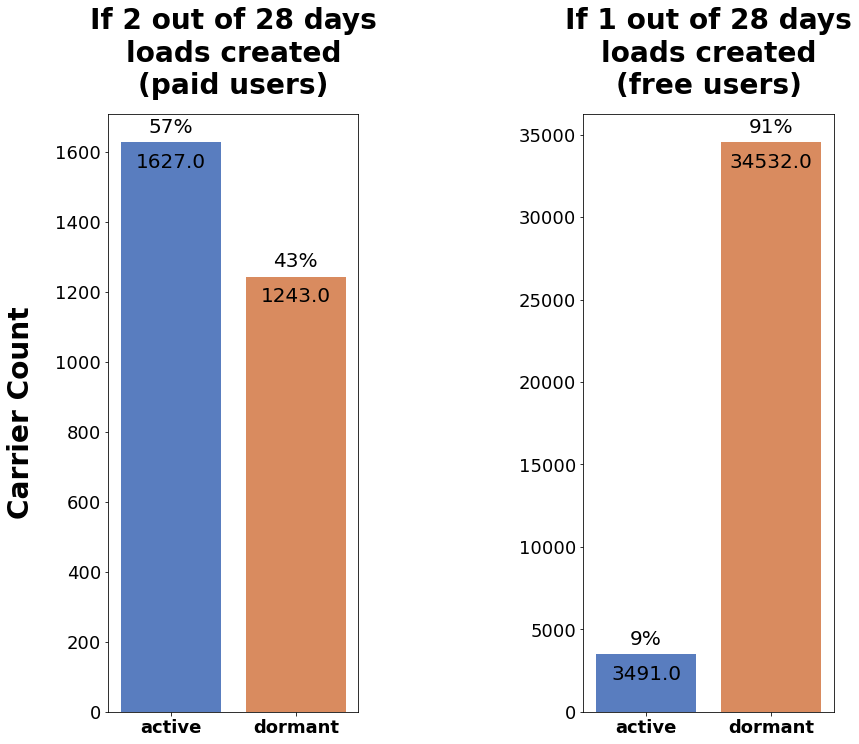

In [25]:
all_users(2,1)

In [ ]:
3